# AMAL VINOB

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
mall_df = pd.read_csv("./Mall_Customers.csv")

In [64]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [65]:
mall_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [66]:
mall_df.drop("Gender", axis=1, inplace=True)
# we are droping the colum that is not a an integer

In [67]:
mall_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


# transformation

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
mall_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [70]:
mail_scaled = scaler.fit_transform(mall_df)

In [71]:
mail_scaled

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

In [72]:
mail_scaled_df = pd.DataFrame(mail_scaled, columns=["CustomerID", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

In [73]:
mail_scaled_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


# noww clustering

In [74]:
from sklearn.cluster import AgglomerativeClustering


In [75]:
mail_scaled_df.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [76]:
agg_clust = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')

In [77]:
agg_clust.fit_predict(mail_scaled_df)

array([4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 3, 5, 3, 5, 4, 5, 4, 5, 3, 5, 4, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 2, 5, 3, 6,
       3, 6, 2, 6, 6, 6, 2, 6, 6, 2, 2, 2, 2, 2, 6, 2, 2, 6, 2, 2, 2, 6,
       2, 2, 6, 6, 2, 2, 2, 2, 2, 6, 2, 2, 6, 2, 2, 2, 2, 2, 6, 2, 2, 6,
       6, 2, 2, 6, 2, 6, 6, 6, 2, 6, 2, 6, 6, 2, 2, 6, 2, 6, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 2, 2, 2, 2, 6, 6, 6, 1, 0, 1, 7, 1, 7, 1, 7, 1,
       0, 1, 0, 1, 7, 1, 0, 1, 7, 1, 0, 1, 0, 1, 7, 1, 0, 1, 7, 1, 7, 1,
       7, 1, 0, 1, 0, 1, 7, 1, 0, 1, 7, 1, 0, 1, 0, 1, 0, 1, 0, 1, 7, 1,
       7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

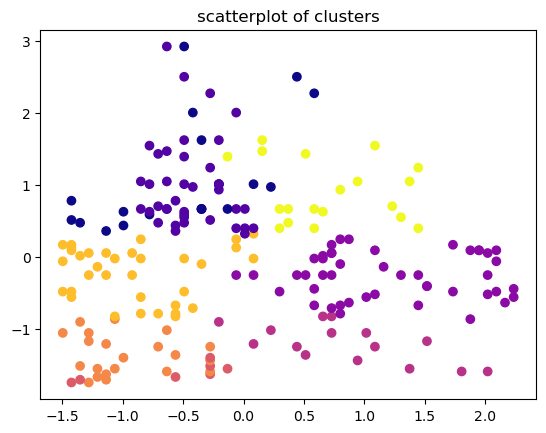

In [78]:
plt.title("scatterplot of clusters")
plt.scatter(mail_scaled_df.iloc[:,1], mail_scaled_df.iloc[:,2], c=agg_clust.labels_, cmap='plasma');

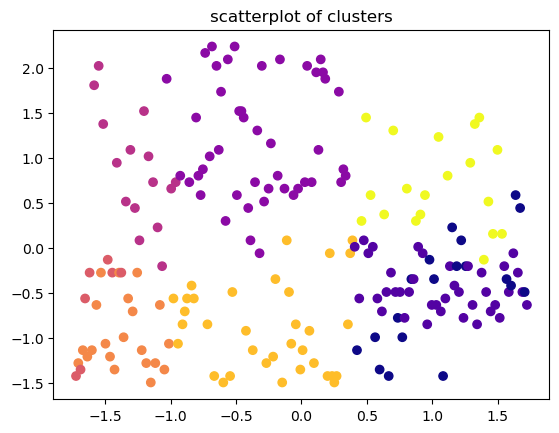

In [79]:
plt.title("scatterplot of clusters")
plt.scatter(mail_scaled_df.iloc[:,0], mail_scaled_df.iloc[:,1], c=agg_clust.labels_, cmap='plasma');

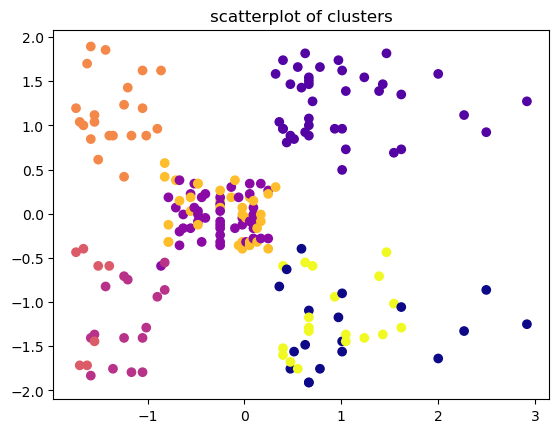

In [80]:
plt.title("scatterplot of clusters")
plt.scatter(mail_scaled_df.iloc[:,2], mail_scaled_df.iloc[:,3], c=agg_clust.labels_, cmap='plasma')

In [81]:
mail_scaled_df.columns



Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

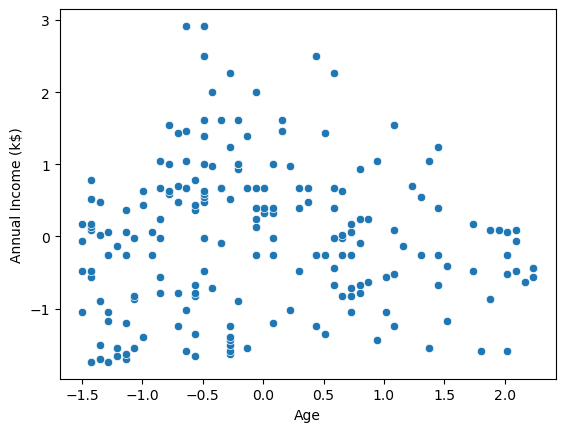

In [82]:
sns.scatterplot(data=mail_scaled_df, x="Age", y ="Annual Income (k$)"  )

In [83]:
# everything from begning




df = pd.read_csv("./Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [84]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# multiple linear regression

In [85]:
x_mlr_feature = mall_df[['Annual Income (k$)', 'Spending Score (1-100)']]
x_mlr_feature

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [86]:
mlr_y =  mall_df[["Age"]]

In [87]:
mlr_y

,Age
0,19
1,21
2,20
3,23
4,31
...,...
195,35
196,45
197,32
198,32


In [88]:
MLRtrain_X,MLRtest_X,MLRtrain_Y,MLRtest_y = train_test_split(x_mlr_feature,mlr_y, train_size=0.8, random_state=42)

In [89]:
ml_X = sm.add_constant(x_mlr_feature)

In [90]:
MLRmodel = sm.OLS(MLRtest_y,MLRtest_X).fit()

In [91]:
MLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Age   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              76.31
Date:                Sun, 26 Nov 2023   Prob (F-statistic):                    4.93e-14
Time:                        12:08:55   Log-Likelihood:                         -173.24
No. Observations:                  40   AIC:                                      350.5
Df Residuals:                      38   BIC:                                      353.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Annual Income (k$)         0.4880      0.077      6.336      0.000       0.332       0.644
Spending Score (1-100)     0.1383      0.100      1.381      0.175      -0.064       0.341
==============================================================================
Omnibus:                        3.782   Durbin-Watson:                   2.412
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.553
Skew:                           0.698   Prob(JB):                        0.169
Kurtosis:                       2.575   Cond. No.                         3.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
MLRtrain_X,MLRtest_X,MLRtrain_Y,MLRtest_y = train_test_split(ml_X,mlr_y, train_size=0.8, random_state=42)

In [93]:
MLRmodel = sm.OLS(MLRtest_y,MLRtest_X).fit()

In [94]:
MLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     4.442
Date:                Sun, 26 Nov 2023   Prob (F-statistic):             0.0187
Time:                        12:08:55   Log-Likelihood:                -159.15
No. Observations:                  40   AIC:                             324.3
Df Residuals:                      37   BIC:                             329.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     55.7413      9.062      6.151      0.000      37.380      74.103
Annual Income (k$)        -0.0668      0.106     -0.633      0.531      -0.281       0.147
Spending Score (1-100)    -0.2986      0.101     -2.966      0.005      -0.503      -0.095
==============================================================================
Omnibus:                        3.526   Durbin-Watson:                   2.546
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.764
Skew:                           0.642   Prob(JB):                        0.251
Kurtosis:                       3.087   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""